<a href="https://colab.research.google.com/github/kovasant/Anomaly_Detection_Dark_WEB/blob/main/Kovas_Anomaly_Detection_Dark_WEB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#εγκατάσταση πακέτου PyOD (https://pyod.readthedocs.io/en/latest/)
!pip install pyod

In [27]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
#from sklearn.ensemble import IsolationForest
# from pyod.models.iforest import IForest
#from sklearn.neighbors import LocalOutlierFactor
#from sklearn.covariance import EllipticEnvelope
#from pyod.utils.data import evaluate_print

In [28]:
#Φόρτωση δεδομένων Dark Web - αρχείο csv
url = "https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/DarkNet.csv"
data = pd.read_csv(url, low_memory=False)

In [30]:
#Προεπεξεργασία δεδομένων - Αφαίρεση μη έγκυρων τιμών και κανονικοποίηση δεδομένων
data_numeric = data.select_dtypes(include=[np.number])
data_numeric = data_numeric.dropna()
# Κανονικοποίηση
data_normalized = (data_numeric - data_numeric.min()) / (data_numeric.max() - data_numeric.min())
# Αντικατάσταση κενών τιμών
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_normalized)

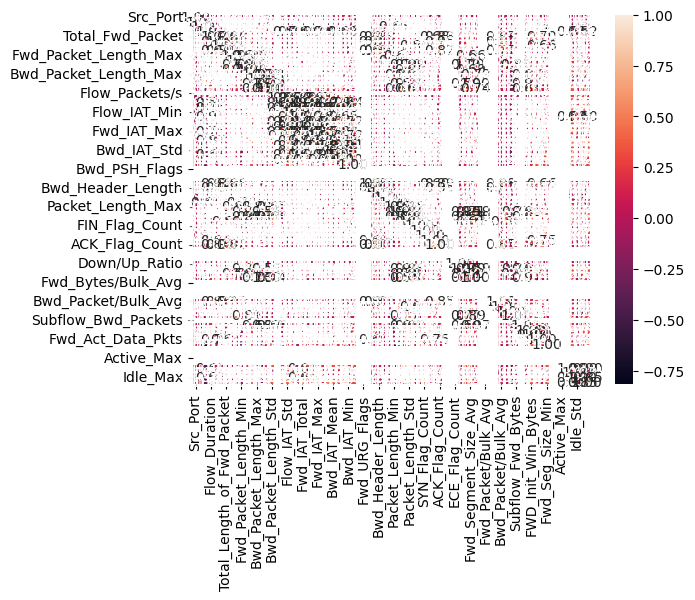

In [31]:
#Ανάλυση των δεδομένων του παραδείγματος
# sns.pairplot(data_normalized)
# plt.show()
sns.heatmap(data_normalized.corr(), annot=True, fmt=".2f")
plt.show()


In [32]:
#Χρήση του αλγορίθμου Isolation Forest για Ανίχνευση ανωμαλιών
# clf = IForest(contamination=0.1)  # Καθορισμός ποσοστού ανωμαλιών
# clf.fit(data_normalized)
# Ανίχνευση ανωμαλιών με Elliptic Envelope
# clf = EllipticEnvelope(contamination=0.1)
# clf.fit(data_normalized)
# Ανίχνευση ανωμαλιών με τον αλγόριθμο Local Outlier Factor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1, n_jobs=-1)
y_pred = clf.fit_predict(data_imputed)

In [35]:
# Εξαγωγή των πραγματικών ετικετών από το αρχικό DataFrame
label_columns = data.select_dtypes(include=[object]).columns  # Βρίσκει τις στήλες με αντικείμενα (δηλαδή συμβολοσειρές)
if len(label_columns) > 0:  # Εάν υπάρχουν στήλες με αντικείμενα
    label_column = label_columns[0]  # Επιλέγει την πρώτη στήλη με αντικείμενα
    y_true = data[label_column]  # Χρησιμοποιεί τη στήλη αυτή για τις πραγματικές ετικέτες
    print("True Labels:")
    print(y_true)
    print("\nPredicted Labels:")
    print(y_pred)

True Labels:
0         10.152.152.11
1         10.152.152.11
2         10.152.152.11
3         10.152.152.11
4         10.152.152.11
              ...      
68575        10.8.8.246
68576        10.8.8.246
68577        10.8.8.246
68578        10.8.8.246
68579    80.239.235.110
Name: Src_IP, Length: 68580, dtype: object

Predicted Labels:
[1 1 1 ... 1 1 1]
